Assignment 5 - Basic statistics & plotting 

Anju Ann Paul

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#To calculate trimmed mean
from scipy.stats import trim_mean

In [73]:
df=pd.read_csv('airlines.csv')

In [74]:
Col1=df.loc[:,'Statistics.Flights.Total']

In [75]:
Col1

0       30060
1        9639
2        8287
3        8670
4        6513
        ...  
4403     6016
4404     9739
4405    13206
4406     8699
4407     5996
Name: Statistics.Flights.Total, Length: 4408, dtype: int64

In [76]:
print("Mean is",Col1.mean())

Mean is 11897.860254083485


In [77]:
print("Median is",Col1.median())

Median is 9739.5


In [78]:
print("Mode is",Col1.mode())

Mode is 0    10964
dtype: int64


In [79]:
#trimming 20%
print("20% Trimmed mean is",trim_mean(Col1, 0.2))

20% Trimmed mean is 10150.331821617536


<AxesSubplot:ylabel='Frequency'>

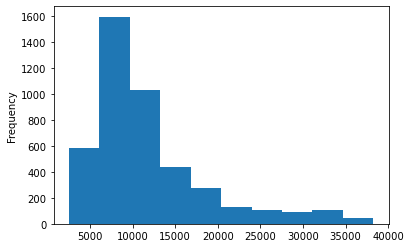

In [80]:
Col1.plot(kind='hist',y='Statistics.Flights.Total')

It is a right skewed histogram which is why mean is greater than median, mode and trimmed mean.

In [81]:
#mean absolute deviation
print("Mean Absolute Deviation(MAD) is",Col1.mad())

Mean Absolute Deviation(MAD) is 5030.1265081470665


In [82]:
#standard deviation
print("Standard Deviation(STD) is",Col1.std())

Standard Deviation(STD) is 6861.691876280836


In [83]:
#interquartile range (the difference of the 75% and 25% quantile)
print("75% quantile is",Col1.quantile(0.75))
print("25% quantile is",Col1.quantile(0.25))
print("Interquartile range (IQR) is",Col1.quantile(0.75) - Col1.quantile(0.25))

75% quantile is 13842.5
25% quantile is 7400.0
Interquartile range (IQR) is 6442.5


MAD, STD and IQR is in 5000-7000 range. Since it is a right skewed data, the values lie to the left of the max frequency plot 

<AxesSubplot:>

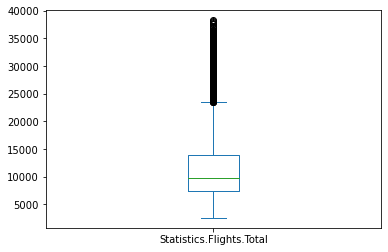

In [84]:
Col1.plot(kind='box',y='Statistics.Flights.Total')

From the box plot, it looks like the median hovers around 10000. 75% quantile is below 15000. 25% quantile is between 5000 and 10000. They all seem to match with the actual value.

In [85]:
Col2=df.loc[:,'Airport.Name']
Col2

0       Atlanta, GA: Hartsfield-Jackson Atlanta Intern...
1                         Boston, MA: Logan International
2       Baltimore, MD: Baltimore/Washington Internatio...
3          Charlotte, NC: Charlotte Douglas International
4       Washington, DC: Ronald Reagan Washington National
                              ...                        
4403               San Diego, CA: San Diego International
4404            Seattle, WA: Seattle/Tacoma International
4405       San Francisco, CA: San Francisco International
4406     Salt Lake City, UT: Salt Lake City International
4407                       Tampa, FL: Tampa International
Name: Airport.Name, Length: 4408, dtype: object

<AxesSubplot:xlabel='Airport.Name'>

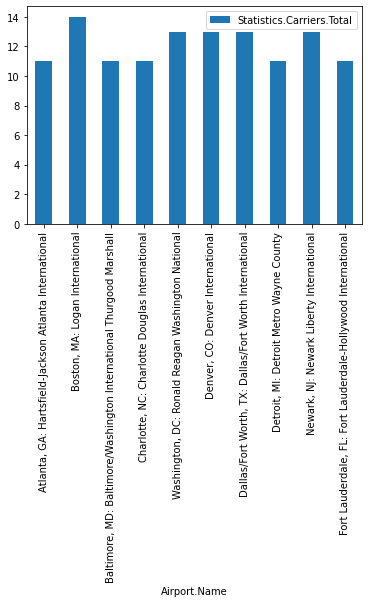

In [86]:
#Barplot
a=df.loc[:9,['Airport.Name','Statistics.Carriers.Total']]
a.plot(kind='bar',x='Airport.Name',y='Statistics.Carriers.Total')

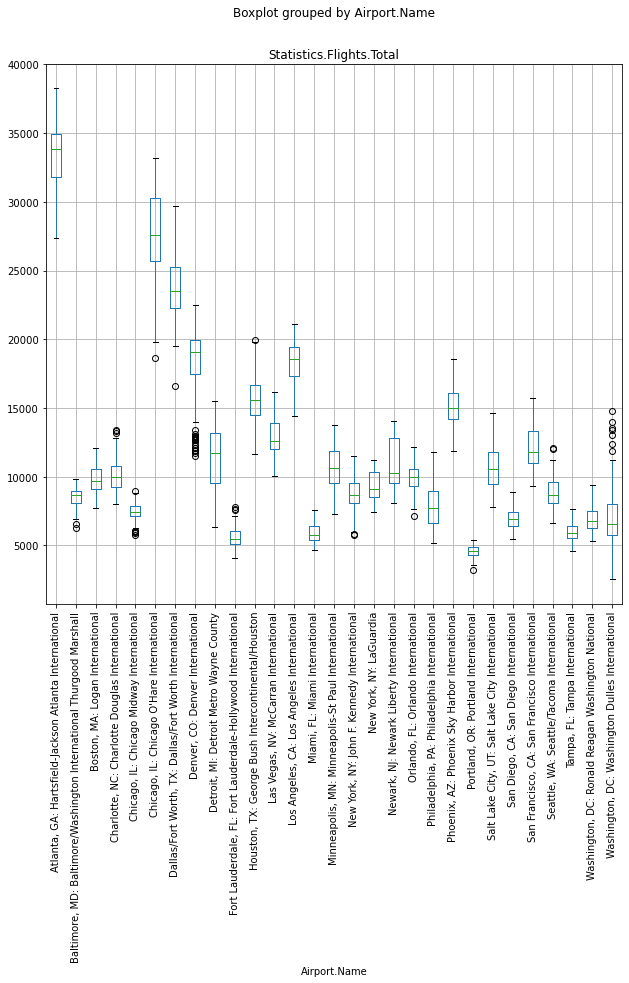

In [87]:
#Boxplot
ax = df.boxplot(by='Airport.Name', column='Statistics.Flights.Total',
                           figsize=(10, 10),rot=90)

In [88]:
Col3=df.loc[:,'Statistics.Flights.On Time']  

In [89]:
#Correlation
Corr=Col1.corr(Col3)
Corr
print("Correlation is",Corr)

Correlation is 0.9803864423283524


There is a strong correlation between total flights and flights on time.

<AxesSubplot:xlabel='Statistics.Flights.Total', ylabel='Statistics.Flights.On Time'>

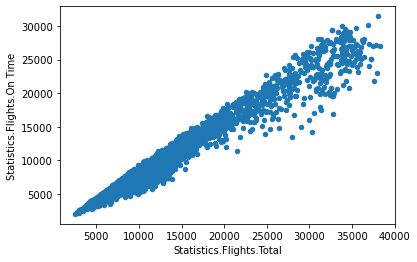

In [90]:
#Scatterplot
df.plot.scatter(x='Statistics.Flights.Total',y='Statistics.Flights.On Time')

<AxesSubplot:xlabel='Statistics.Flights.Total', ylabel='Statistics.Flights.On Time'>

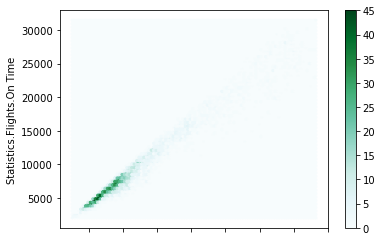

In [91]:
#Hexagonal binning plot
df.plot.hexbin(x='Statistics.Flights.Total',y='Statistics.Flights.On Time')

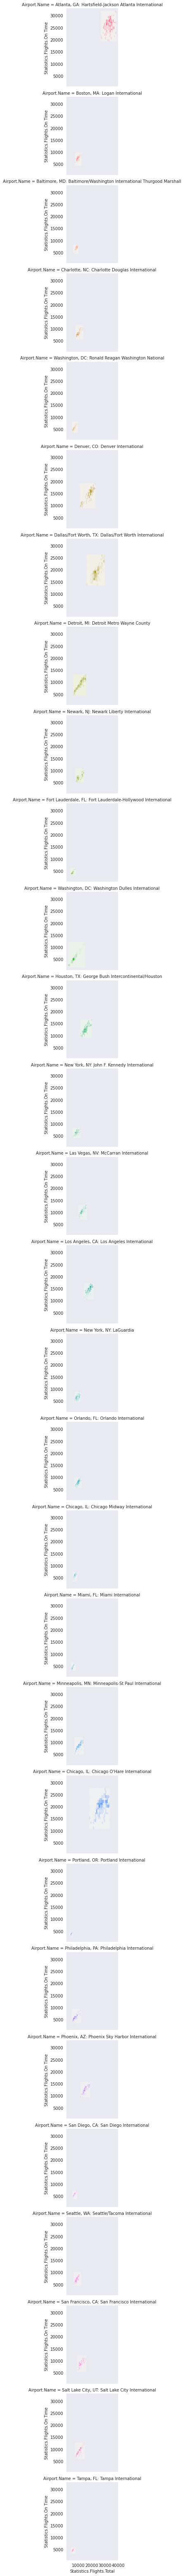

In [93]:
import seaborn as sns
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df,hue="Airport.Name" ,row="Airport.Name")
g.map(hexbin, "Statistics.Flights.Total", "Statistics.Flights.On Time");